Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
path = '/content/gdrive/MyDrive/Data Visualization/austin_weather.csv'
df = pd.read_csv(path, delimiter=',')
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,30.04,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,29.97,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,29.91,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,29.96,29.91,29.87,10,10,10,13,4,20,0,


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

Expected visualization Output:

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

In [11]:
df1 = df[['DewPointAvgF','HumidityAvgPercent','WindAvgMPH','TempAvgF']].replace(['-'],np.nan)

In [12]:
df1.fillna(method="ffill")

,DewPointAvgF,HumidityAvgPercent,WindAvgMPH,TempAvgF
0,49,75,4,60
1,36,68,6,48
2,27,52,3,45
3,28,56,4,46
4,40,71,2,50
...,...,...,...,...
1314,67,54,5,89
1315,64,54,5,91
1316,64,51,4,92
1317,68,48,4,93


In [13]:
df2=df1.astype(float)
df2.dtypes

DewPointAvgF          float64
HumidityAvgPercent    float64
WindAvgMPH            float64
TempAvgF              float64
dtype: object

Text(0, 0.5, 'Dew Point Avg F')

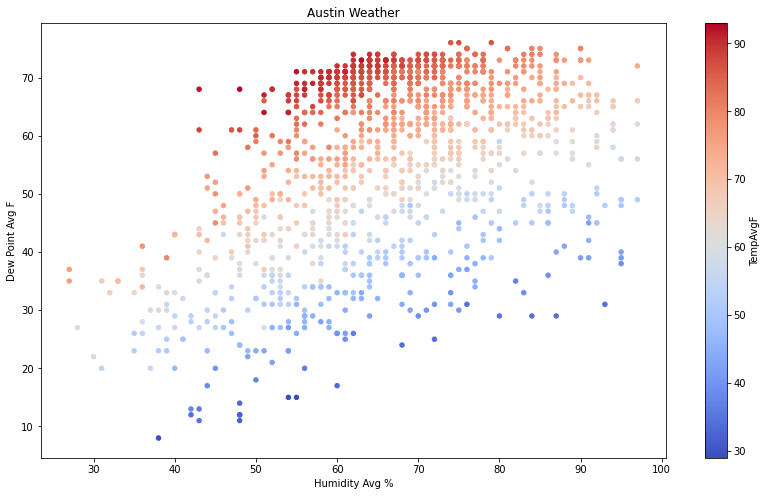

In [14]:
from matplotlib.colors import Colormap
fig,ax=plt.subplots(figsize=(14,8))
df2.plot.scatter(
    title='Austin Weather',
    x='HumidityAvgPercent',
    y='DewPointAvgF',
    c='TempAvgF',
    colormap='coolwarm',
    ax=ax
)
ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg F')

## Berdasarkan Plot diatas menunjukan bahwa suhu < 60 akan berwarna biru serta kelembapannya bisa dibilang stabil, namun ketika suhu >60 maka titik embun dan kelembapan akan memuncak di tingkat kelembapan 55-80%

<h2>Soal 2: Preparing Data</h2>

Manipulasi data di bawah dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

Silahkan Download  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [15]:
path = '/content/gdrive/MyDrive/Data Visualization/vgsales.csv'
dataframe = pd.read_csv(path, delimiter=',')
dataframe

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [16]:
mean_sales = dataframe.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean()
mean_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan data yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

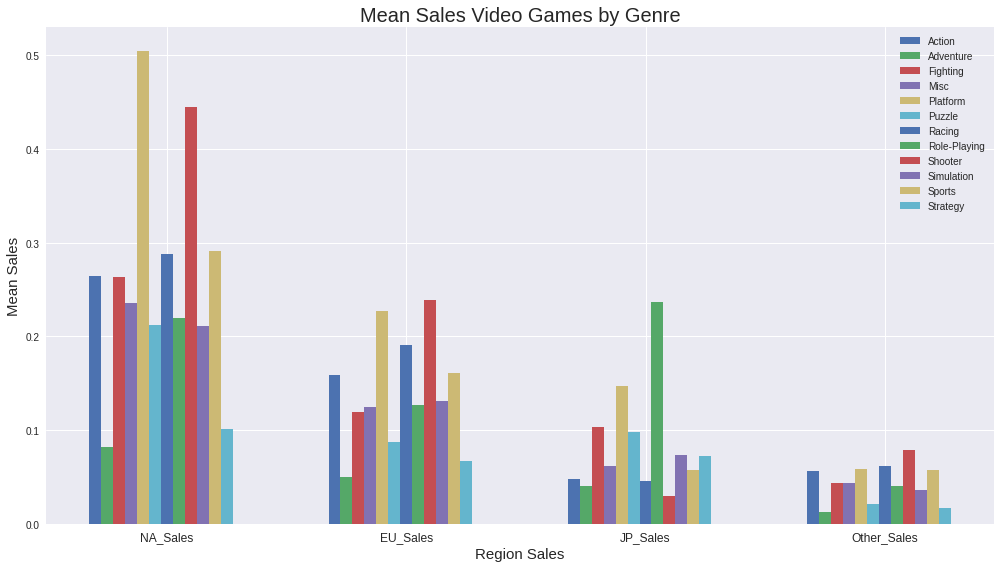

In [26]:
plt.style.use('seaborn')

labels = list(mean_sales.columns)
index_labels = list(mean_sales.index)
x = np.arange(len(labels))
width = 0.3
fig,ax=plt.subplots(figsize=(14,8))

for index, value in enumerate(index_labels):
  ax.bar((x - width)+ index*(width/6), list(mean_sales.loc[value]), (width/6),label=value)

ax.set_xlabel('Region Sales',fontsize=15)
ax.set_ylabel('Mean Sales',fontsize=15)
ax.set_title('Mean Sales Video Games by Genre',fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12)
ax.legend()
fig.tight_layout()
plt.show()

##Berdasarkan diagram diatas yang divisualisasikan secara barplot menunjukan bahwa penjualan tertinggi terdapat pada wilayah NA dengan kategori game Platform dengan jumlah rata-rata 0,5. Sedangkan untuk yang terendah berada wilayah selain NA,EU dan JP yaitu other.

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan data yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)

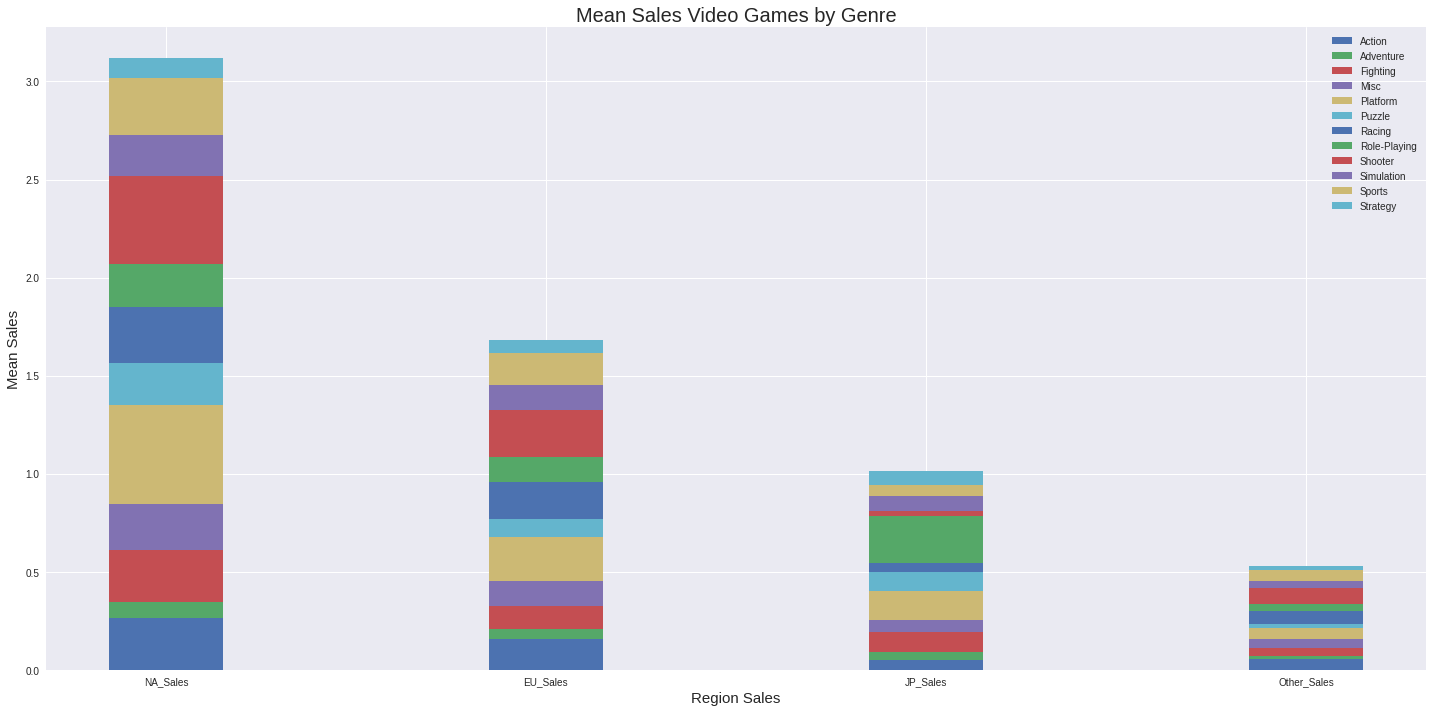

In [30]:
plt.style.use('seaborn')

labels = list(mean_sales.columns)
index_list = list(mean_sales.index)
fig, ax=plt.subplots(figsize=(20,10))
width = 0.3
for index, value in enumerate(index_labels):
    if index == 0:
        bottom = np.array([0.0]*len(labels))
        ax.bar(labels, list(mean_sales.loc[value]), width, label=value)
        bottom += np.array(list(mean_sales.loc[value]))
    else:
        ax.bar(labels, list(mean_sales.loc[value]), width, label= value, bottom=bottom)
        bottom += np.array(list(mean_sales.loc[value]))

ax.set_xlabel('Region Sales',fontsize=15)
ax.set_ylabel('Mean Sales',fontsize=15)
ax.set_title('Mean Sales Video Games by Genre',fontsize=20)
ax.legend()
fig.tight_layout()
plt.show()

##Berdasarkan diagram diatas yang divisualisasikan secara stak barplot menunjukan bahwa penjualan tertinggi terdapat pada wilayah NA dengan total rata-rata penjualan menyenntuh angka 3. Sedangkan untuk yang terendah berada wilayah selain NA,EU dan JP yaitu Other.